In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Feature_Engineered_with_Outliers.csv")

In [5]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
          'month', 'duration', 'campaign', 'previous', 'balance_status', 'age_group']]

In [6]:
df_deposit=df[df['deposit']=='yes']

In [7]:
df_deposit

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group
80,59,admin,married,secondary,no,2343,yes,no,5,17.37,1,0,yes,1,0,1,0,very high,50
83,56,admin,married,secondary,no,45,no,no,5,24.45,1,0,yes,1,0,0,0,low,50
84,41,technician,married,secondary,no,1270,yes,no,5,23.15,1,0,yes,1,0,1,0,high,40
125,55,services,married,secondary,no,2476,yes,no,5,9.65,1,0,yes,1,0,1,0,very high,50
164,54,admin,married,tertiary,no,184,no,no,5,11.22,2,0,yes,1,0,0,0,low,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43257,73,retired,married,secondary,no,2850,no,no,11,5.00,1,8,yes,1,0,0,0,very high,70
43258,25,technician,single,secondary,no,505,no,yes,11,6.43,2,0,yes,1,0,0,1,medium,20
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70


## Age and Balance

In [42]:
X = df['age']
Y = df['balance']

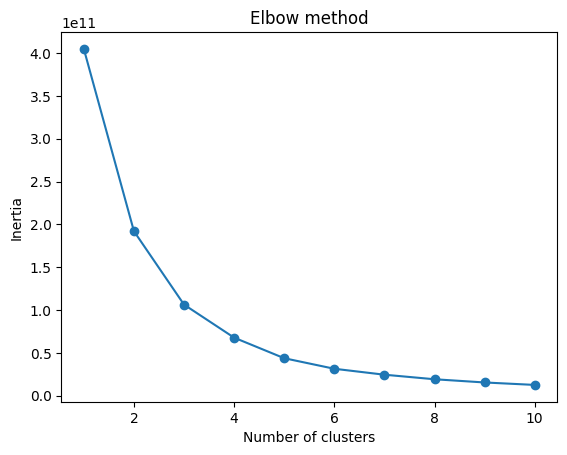

In [43]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select the relevant features for clustering
X = df[['age', 'balance']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 5

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

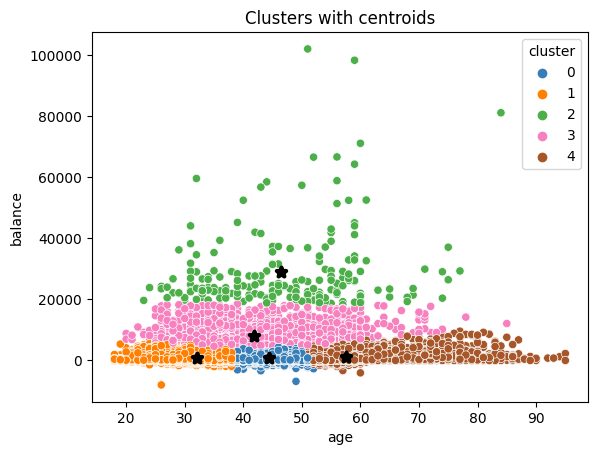

In [45]:
# visualize the clusters
sns.scatterplot(data=df, x='age', y='balance', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [46]:
cluster0=df[['age', 'balance', 'deposit']][df['cluster']==0]
cluster1=df[['age', 'balance', 'deposit']][df['cluster']==1]
cluster2=df[['age', 'balance', 'deposit']][df['cluster']==2]
cluster3=df[['age', 'balance', 'deposit']][df['cluster']==3]
cluster4=df[['age', 'balance', 'deposit']][df['cluster']==4]

In [48]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True))

deposit
no     0.909077
yes    0.090923
Name: proportion, dtype: float64 deposit
no     0.872676
yes    0.127324
Name: proportion, dtype: float64 deposit
no     0.850467
yes    0.149533
Name: proportion, dtype: float64 deposit
no     0.851048
yes    0.148952
Name: proportion, dtype: float64 deposit
no     0.84878
yes    0.15122
Name: proportion, dtype: float64


Inference:
- Majority of customers who subscribed to the term deposit plan have a balance less than 6840, indicating that balance is an important factor in predicting subscription.
- Only a small percentage (5%) of customers with a balance equal to or more than 6840 subscribed to the term deposit plan, suggesting that the bank should focus less on promoting the plan to customers with higher balances.
- The clusters 3rd(orange) and 4th(brown) have a higher subscription rate of almost 15% each as compared to the other clusters. Hence, the bank should focus on promoting the term deposit plan to clients belonging to these clusters to maximize their profits.

## Age

In [49]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,4
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,0
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,4
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,4
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,4


In [90]:
X = df['age_group']
Y = df['balance']

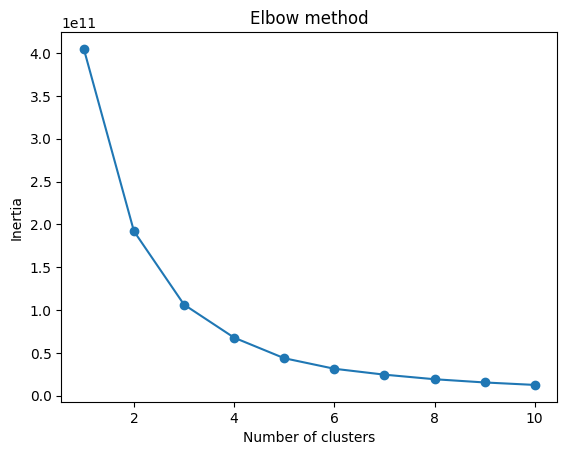

In [91]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# select the relevant features for clustering
X = df[['age_group', 'balance']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 5

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

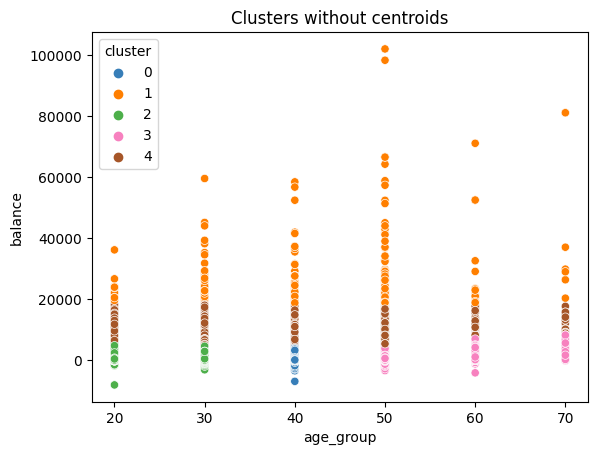

In [102]:
# visualize the clusters
sns.scatterplot(data=df, x='age_group', y='balance', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters without centroids")
plt.show()

Inference:
- This plot suggests that the clusters 2nd and 5th

In [103]:
cluster0=df[['age_group', 'balance', 'deposit']][df['cluster']==0]
cluster1=df[['age_group', 'balance', 'deposit']][df['cluster']==1]
cluster2=df[['age_group', 'balance', 'deposit']][df['cluster']==2]
cluster3=df[['age_group', 'balance', 'deposit']][df['cluster']==3]
cluster4=df[['age_group', 'balance', 'deposit']][df['cluster']==4]

In [104]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True))

deposit
no     0.907481
yes    0.092519
Name: proportion, dtype: float64 deposit
no     0.849765
yes    0.150235
Name: proportion, dtype: float64 deposit
no     0.874252
yes    0.125748
Name: proportion, dtype: float64 deposit
no     0.860567
yes    0.139433
Name: proportion, dtype: float64 deposit
no     0.851442
yes    0.148558
Name: proportion, dtype: float64


## Duration and Campaign

In [58]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,3
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,2
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,3
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,3
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,3
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,3


In [64]:
X = df['duration']
Y = df['campaign']

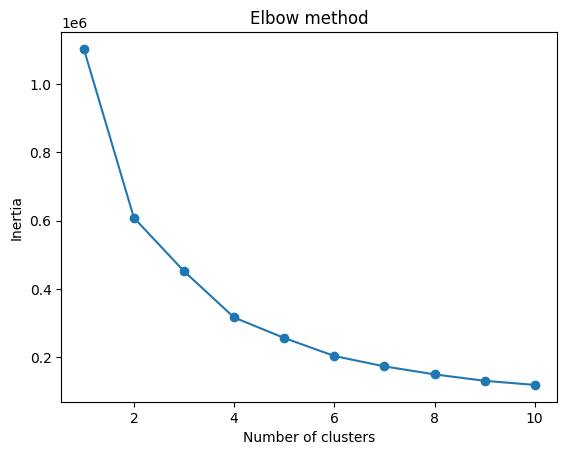

In [65]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [77]:
# select the relevant features for clustering
X = df[['duration', 'campaign']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 5

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

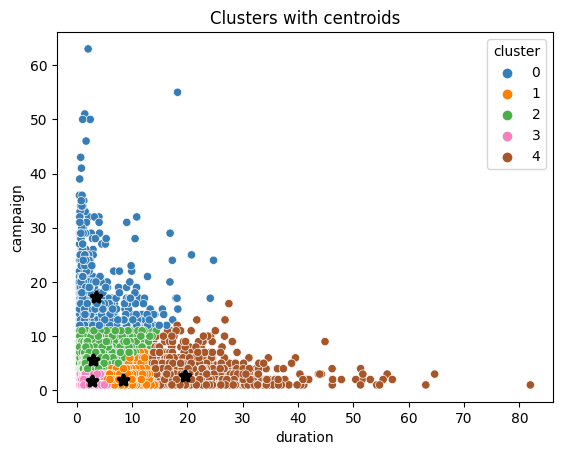

In [78]:
# visualize the clusters
sns.scatterplot(data=df, x='duration', y='campaign', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

Inference:
Customers belonging to the clusters 2nd and 5th have a higher percentage of subscription, 25% and 42%, respectively indicating that the bank should focus on targeting these groups in their marketing campaigns.
It is important for the bank to limit the number of campaigns to 5 or less, as the percentage of customers subscribing to the plan decreases significantly beyond this point.
Another important factor to consider is the duration of the calls. Customers who were engaged for a duration of less than 7 minutes had a lower subscription rate (7%) compared to those who were engaged for longer durations.

In [79]:
cluster0=df[['duration', 'campaign', 'deposit']][df['cluster']==0]
cluster1=df[['duration', 'campaign', 'deposit']][df['cluster']==1]
cluster2=df[['duration', 'campaign', 'deposit']][df['cluster']==2]
cluster3=df[['duration', 'campaign', 'deposit']][df['cluster']==3]
cluster4=df[['duration', 'campaign', 'deposit']][df['cluster']==4]

In [80]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True))

deposit
no     0.953271
yes    0.046729
Name: proportion, dtype: float64 deposit
no     0.742728
yes    0.257272
Name: proportion, dtype: float64 deposit
no     0.960651
yes    0.039349
Name: proportion, dtype: float64 deposit
no     0.927108
yes    0.072892
Name: proportion, dtype: float64 deposit
yes    0.579532
no     0.420468
Name: proportion, dtype: float64


## Month and Campaign

In [81]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,3
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,3
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,3
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,3
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,4
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,1
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,4
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,1


In [82]:
X = df['month']
Y = df['campaign']

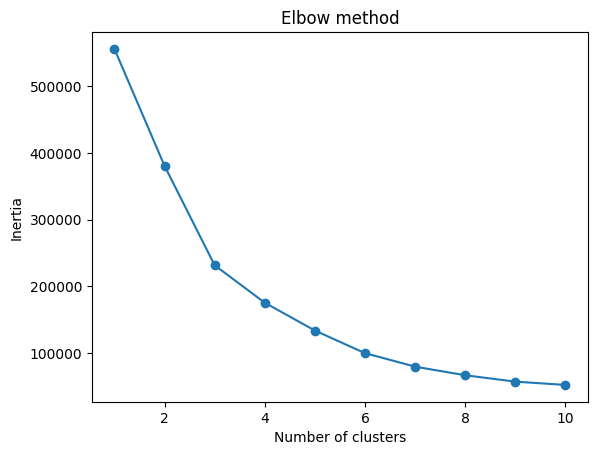

In [83]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [90]:
# select the relevant features for clustering
X = df[['campaign', 'month']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 6

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

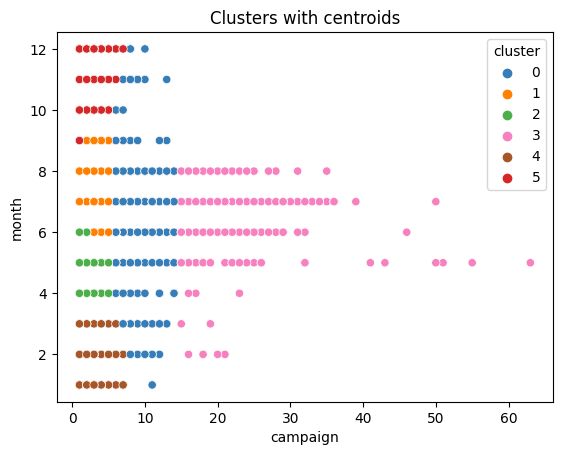

In [102]:
# visualize the clusters
sns.scatterplot(data=df, x='campaign', y='month', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#d62728'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [97]:
cluster0=df[['month', 'campaign', 'deposit']][df['cluster']==0]
cluster1=df[['month', 'campaign', 'deposit']][df['cluster']==1]
cluster2=df[['month', 'campaign', 'deposit']][df['cluster']==2]
cluster3=df[['month', 'campaign', 'deposit']][df['cluster']==3]
cluster4=df[['month', 'campaign', 'deposit']][df['cluster']==4]
cluster5=df[['month', 'campaign', 'deposit']][df['cluster']==5]

In [99]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True),cluster5['deposit'].value_counts(normalize=True))

deposit
no     0.926417
yes    0.073583
Name: proportion, dtype: float64 deposit
no     0.885853
yes    0.114147
Name: proportion, dtype: float64 deposit
no     0.898756
yes    0.101244
Name: proportion, dtype: float64 deposit
no     0.952113
yes    0.047887
Name: proportion, dtype: float64 deposit
no     0.809835
yes    0.190165
Name: proportion, dtype: float64 deposit
no     0.805156
yes    0.194844
Name: proportion, dtype: float64


In [100]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,2
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,2
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,2
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,2
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,5
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,5
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,5
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,5


## previous and campaign

In [103]:
X = df['previous']
Y = df['campaign']

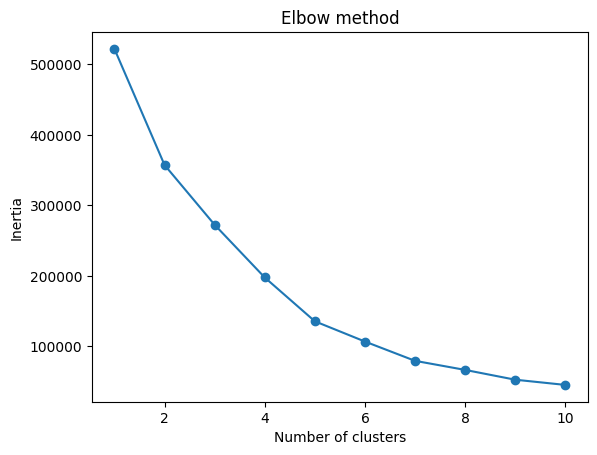

In [104]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [105]:
# select the relevant features for clustering
X = df[['campaign', 'previous']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 6

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df['cluster'] = labels

In [111]:
df['previous'].describe()

count    43264.000000
mean         0.566152
std          2.250769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [116]:
df=df.drop(df[df['previous']==275].index)

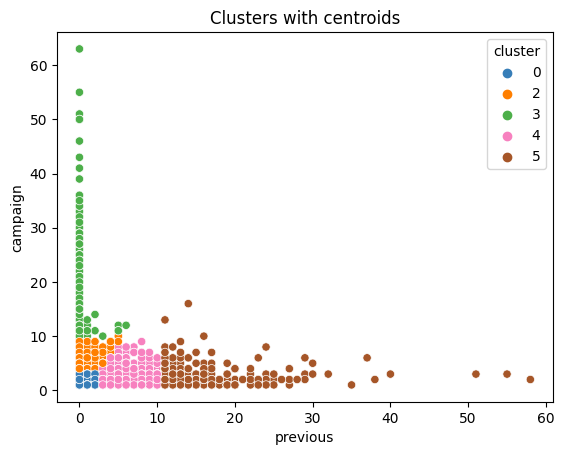

In [117]:
# visualize the clusters
sns.scatterplot(data=df, x='previous', y='campaign', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#d62728'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

Inference:
- The clusters 4th(pink) and 5th(brown) have a higher percentage of subscription, 28% and 21%, respectively indicating that the bank should focus on these groups while promoting their term deposit plan.
- It is important for the bank to perform more number of contacts i.e, more than 3 times to customers before the recent campaign, as the percentage of customers subscribing to the plan decreases significantly below this point.
- Another important factor to consider is bank need to ensure to not make more than 5 calls in current campaign as the percentage of customers subscribing beyond this point reduces to almost 5%.

In [107]:
cluster0=df[['previous', 'campaign', 'deposit']][df['cluster']==0]
cluster1=df[['previous', 'campaign', 'deposit']][df['cluster']==1]
cluster2=df[['previous', 'campaign', 'deposit']][df['cluster']==2]
cluster3=df[['previous', 'campaign', 'deposit']][df['cluster']==3]
cluster4=df[['previous', 'campaign', 'deposit']][df['cluster']==4]
cluster5=df[['previous', 'campaign', 'deposit']][df['cluster']==5]

In [108]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True),cluster5['deposit'].value_counts(normalize=True))

deposit
no     0.88179
yes    0.11821
Name: proportion, dtype: float64 deposit
no    1.0
Name: proportion, dtype: float64 deposit
no     0.917889
yes    0.082111
Name: proportion, dtype: float64 deposit
no     0.940079
yes    0.059921
Name: proportion, dtype: float64 deposit
no     0.719747
yes    0.280253
Name: proportion, dtype: float64 deposit
no     0.786561
yes    0.213439
Name: proportion, dtype: float64


In [8]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50


In [9]:
df["balance_status"].loc[(df['balance']>=df.balance.quantile(0.0)) & 
                         (df['balance']<=df.balance.quantile(0.15))] = 'negative'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.15)) & 
                         (df['balance']<=df.balance.quantile(0.4))] = 'low'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.4)) & 
                         (df['balance']<=df.balance.quantile(0.6))] = 'medium'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.6)) & 
                         (df['balance']<=df.balance.quantile(0.8))] = 'high'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.8)) & 
                         (df['balance']<=df.balance.quantile(1.0))] = 'very high'

In [10]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50


In [21]:
df_converted = df.copy()

In [22]:
df_converted['education'] = df_converted['education'].replace({"primary":1,"secondary":2,"tertiary":3,"other":0})

In [50]:
df_converted['marital'] = df_converted['marital'].replace({"single":1,"married":3,"divorced":2})

In [35]:
X = df_converted['education']
Y = df_converted['age']

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

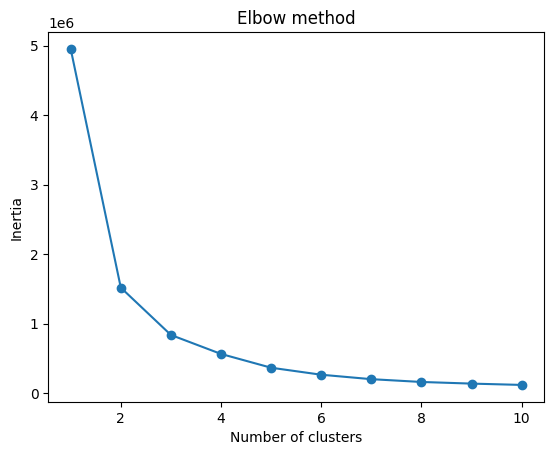

In [37]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [46]:
# select the relevant features for clustering
X = df_converted[['education', 'age']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 4

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df_converted['cluster'] = labels

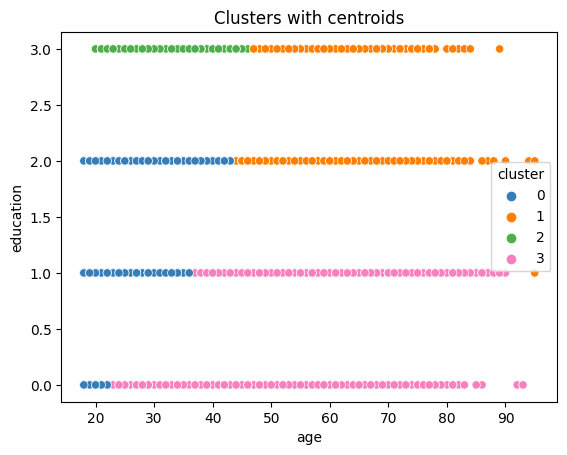

In [47]:
# visualize the clusters
sns.scatterplot(data=df_converted, x='age', y='education', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [48]:
cluster0=df_converted[['education', 'age', 'deposit']][df_converted['cluster']==0]
cluster1=df_converted[['education', 'age', 'deposit']][df_converted['cluster']==1]
cluster2=df_converted[['education', 'age', 'deposit']][df_converted['cluster']==2]
cluster3=df_converted[['education', 'age', 'deposit']][df_converted['cluster']==3]
cluster4=df_converted[['education', 'age', 'deposit']][df_converted['cluster']==4]

In [49]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True))

deposit
no     0.894409
yes    0.105591
Name: proportion, dtype: float64 deposit
no     0.871235
yes    0.128765
Name: proportion, dtype: float64 deposit
no     0.844449
yes    0.155551
Name: proportion, dtype: float64 deposit
no     0.896842
yes    0.103158
Name: proportion, dtype: float64 Series([], Name: proportion, dtype: float64)


## marital and education

In [56]:
X = df_converted['age']
Y = df_converted['marital']

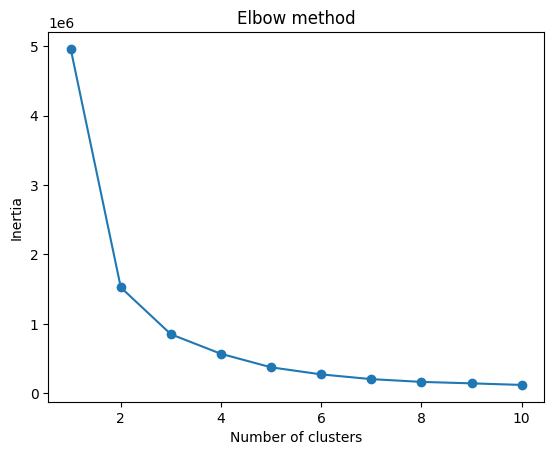

In [57]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [61]:
# select the relevant features for clustering
X = df_converted[['marital', 'age']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 4

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df_converted['cluster'] = labels

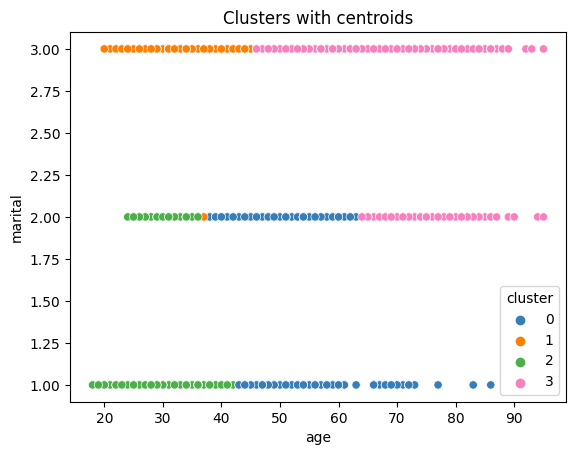

In [63]:
# visualize the clusters
sns.scatterplot(data=df_converted, x='age', y='marital', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [64]:
cluster0=df_converted[['age', 'marital', 'deposit']][df_converted['cluster']==0]
cluster1=df_converted[['age', 'marital', 'deposit']][df_converted['cluster']==1]
cluster2=df_converted[['age', 'marital', 'deposit']][df_converted['cluster']==2]
cluster3=df_converted[['age', 'marital', 'deposit']][df_converted['cluster']==3]
cluster4=df_converted[['age', 'marital', 'deposit']][df_converted['cluster']==4]

In [65]:
print(cluster0['deposit'].value_counts(normalize=True),cluster1['deposit'].value_counts(normalize=True),
     cluster2['deposit'].value_counts(normalize=True),cluster3['deposit'].value_counts(normalize=True),
     cluster4['deposit'].value_counts(normalize=True))

deposit
no     0.882284
yes    0.117716
Name: proportion, dtype: float64 deposit
no     0.908671
yes    0.091329
Name: proportion, dtype: float64 deposit
no     0.843492
yes    0.156508
Name: proportion, dtype: float64 deposit
no     0.867765
yes    0.132235
Name: proportion, dtype: float64 Series([], Name: proportion, dtype: float64)


In [ ]:
## balance status and age 

In [ ]:
data=list(zip(X,Y))
inertias=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1,11),inertias,marker='o')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
# select the relevant features for clustering
X = df_converted[['marital', 'age']]

# normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# set the number of clusters
k = 4

# train the model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# predict the cluster labels
labels = kmeans.predict(X_scaled)

# add the cluster labels to the original dataset
df_converted['cluster'] = labels

In [ ]:
# visualize the clusters
sns.scatterplot(data=df_converted, x='age', y='marital', hue='cluster', palette=['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628'])
# Plot the centroids with darker and bigger markers
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
#plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=50, linewidths=3, color='black', zorder=4)
plt.title("Clusters with centroids")
plt.show()

In [ ]:
sns.

<Axes: xlabel='age', ylabel='age'>

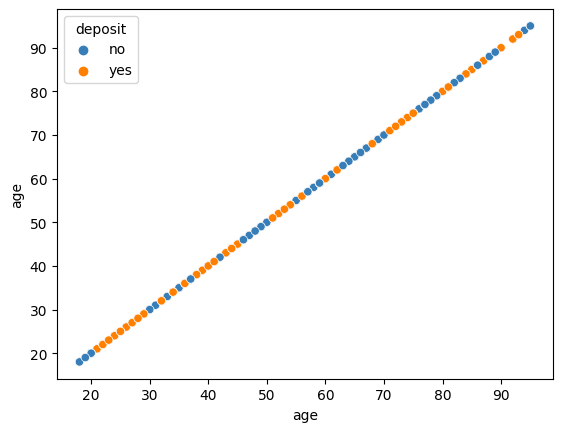

In [69]:
# Create a scatter plot of age vs. deposit, with separate colors for yes and no
sns.scatterplot(data=df, x="age", y="age", hue="deposit", palette=["#377eb8", "#ff7f00"])

<Axes: xlabel='deposit', ylabel='age'>

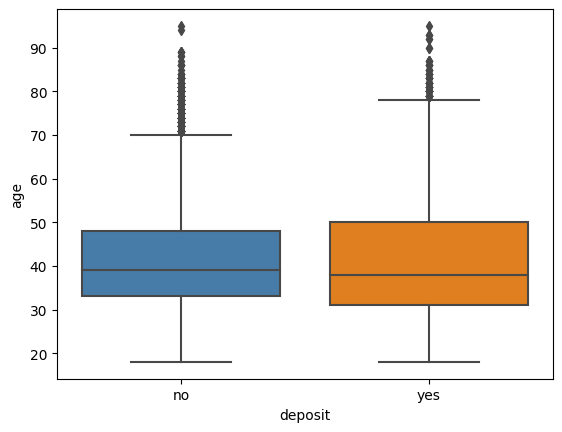

In [70]:
sns.boxplot(data=df, x="deposit", y="age", palette=["#377eb8", "#ff7f00"])

<Axes: xlabel='deposit', ylabel='age'>

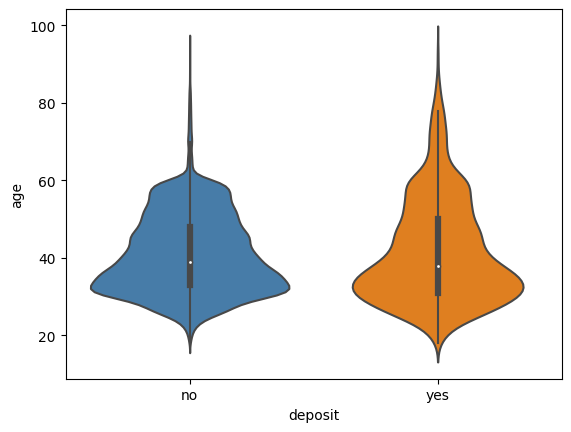

In [71]:
sns.violinplot(data=df, x="deposit", y="age", palette=["#377eb8", "#ff7f00"])

<Axes: xlabel='age', ylabel='Count'>

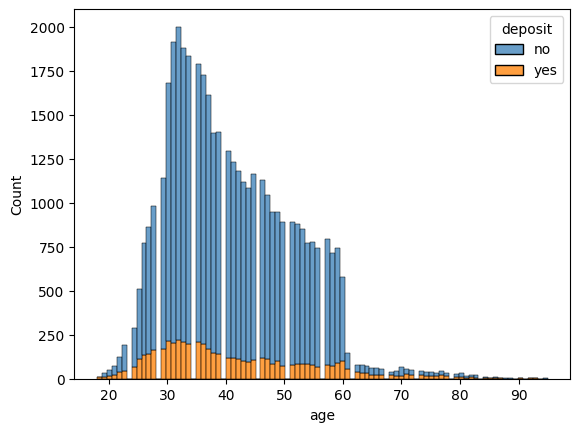

In [79]:
# Create a heatmap of age vs. deposit
sns.histplot(data=df, x="age", hue="deposit", multiple="stack", palette=["#377eb8", "#ff7f00"])

<Axes: xlabel='age', ylabel='Density'>

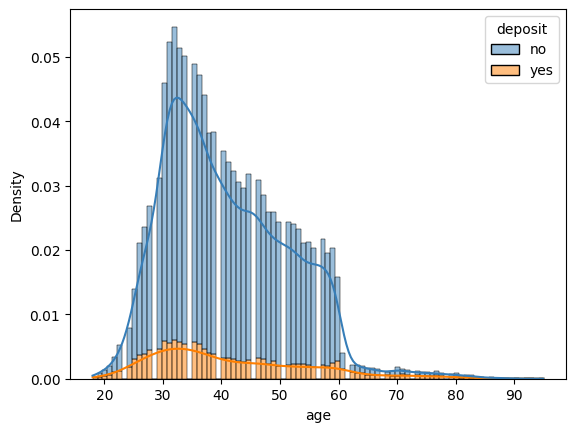

In [85]:
# Create a histogram of age vs. deposit
sns.histplot(data=df, x="age", hue="deposit", multiple="stack", palette=["#377eb8", "#ff7f00"], stat= 'density',kde=True)

In [105]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group,cluster
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50,3
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30,2
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0,high,50,3
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0,high,70,3
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0,very high,70,3
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0,medium,50,3


In [106]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='balance_status', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [107]:
round(percentages,2)

deposit,no,yes
balance_status,,
high,86.03,13.97
low,89.94,10.06
medium,87.78,12.22
negative,92.78,7.22
very high,82.95,17.05


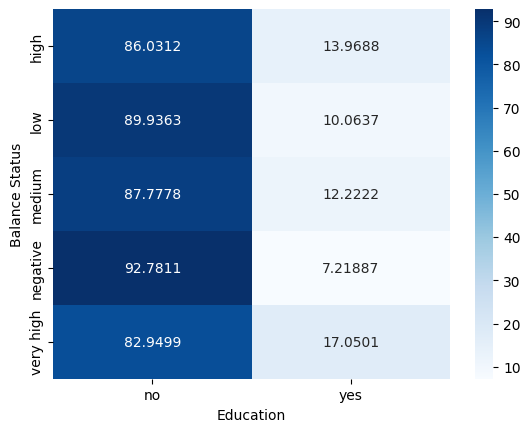

In [113]:
# Create heatmap
sns.heatmap(percentages, annot=True, fmt='g',cmap='Blues')
plt.xlabel('Education')
plt.ylabel('Balance Status')
plt.show()